# Praktikum 06 - Dimensionality Reduction

In [2]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb # data visualization library  
import matplotlib.pyplot as plt

## Importing data

The data can be imported using Pandas with the command `pd.read_csv()`.

In many cases, this does not work directly. This is usually due to one of the following issues:
- `FileNotFoundError` --> Either the file name is spelled incorrectly or the path is incorrect.
- `UnicodeDecodeError` --> Either the file name (+path) contains invalid characters (in Windows, for example, "//" must often be used instead of "/"), or the file itself is not saved in the expected "encoding." For the latter, there are two options: (1) Convert the file with an editor. Or (2) set the parameter `encoding=... ` parameter.
There are many possible encodings ([see link](https://docs.python.org/3/library/codecs.html#standard-encodings)), but the most common are "utf-8" (the standard), "ANSI" (on Mac: "iso-8859-1" or "ISO8859") or "ASCII".
- `ParserError` --> Usually means that the "delimiter" (i.e., the separator) is specified incorrectly. It is best to open the file briefly with an editor and check, then set it accordingly with `delimiter="..."`. Typical separators are `","`, `";"`, `"\t"` (tab).
- If the file does not start with the desired column names, this can be corrected by specifying the rows to be skipped --> `skiprows=1` (1, 2, 3,... depending on the case).

In [13]:
filename = "breast_cancer_wisconsin_data.csv"
path_data = "../dataset"

data = pd.read_csv(os.path.join(path_data, filename), index_col=0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# (1) Initial data exploration
This should be familiar by now... :)

- Are there any missing values? --> `.info()`
- Initial overview & search for problematic entries --> `.describe()`

In [9]:
data.info()     

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [10]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# (2) Data cleaning
- Remove entries with NaNs
- In this case, there is at least one column that we can safely remove...

Columns can be removed using, for example
```python
to_drop = ["column_abc", "column_xyz"]
data = data.drop(to_drop, axis=1)
```

In [14]:
#data = data.drop("Unnamed: 32", axis=1)
data = data.drop(data.columns[-1], axis=1)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# (3) Exploring data
We have tried various ways of exploring data so far.

- Display all distributions with `data.hist()`
- Display the distributions and respective pairwise dependencies with `sb.pairplot()`
- Display the correlations with `data.corr()` or `sb.heatmap(data.corr())`.

In addition, we have the usual Pandas methods to take a closer look at the data, e.g., using `.plot()`, `.value_counts()` (for categorical data), or masks for more complicated questions.

## Tasks:
1) Pair plot --> Code is provided, just execute and discuss. 
- Based on the data, how likely is it that we can distinguish between malignant ("malignant") and benign ("benign")?

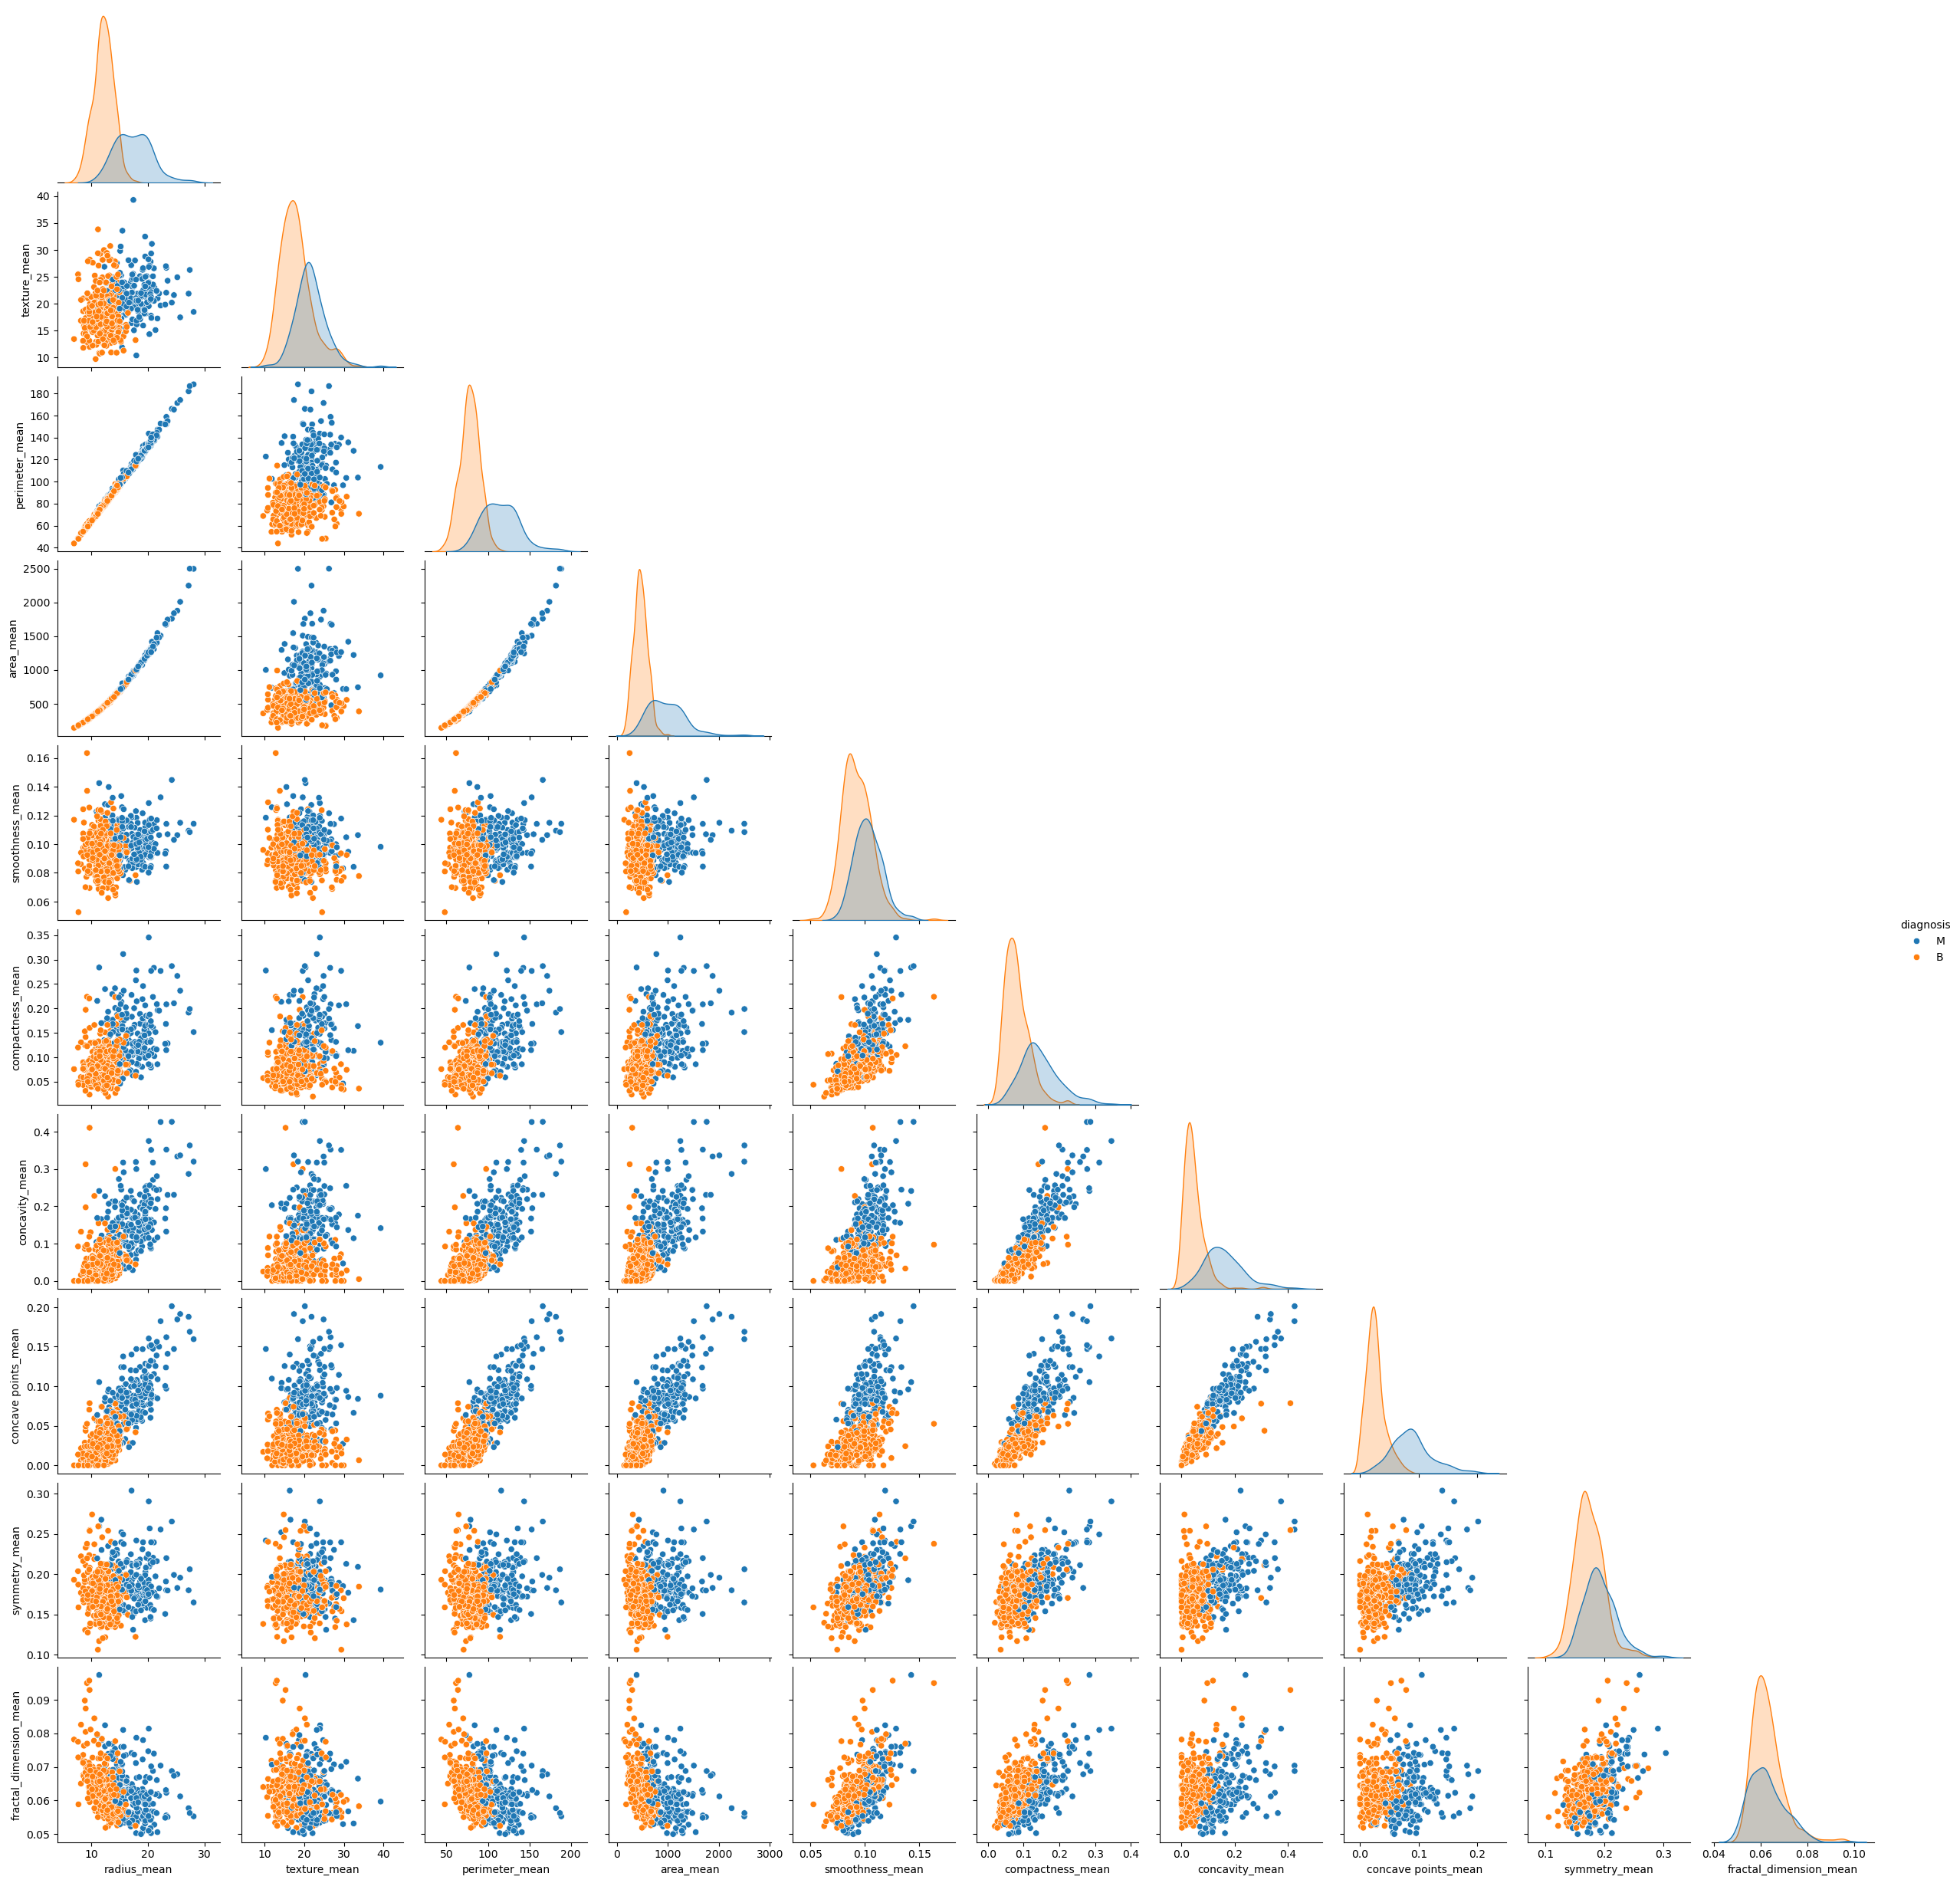

In [ ]:
sb.pairplot(
    data,
    hue='diagnosis',
    vars=['radius_mean', 'texture_mean',
          'perimeter_mean', 'area_mean',
          'smoothness_mean', 'compactness_mean',
          'concavity_mean', 'concave points_mean',
          'symmetry_mean', 'fractal_dimension_mean'],
    corner=True
)

# Split into data (X) and labels (y)

In [18]:
# Labels ("y")
y = data["diagnosis"]                   # M or B 

# Daten ("X")
X = data.drop("diagnosis", axis=1)

## Correlation analysis

<Axes: >

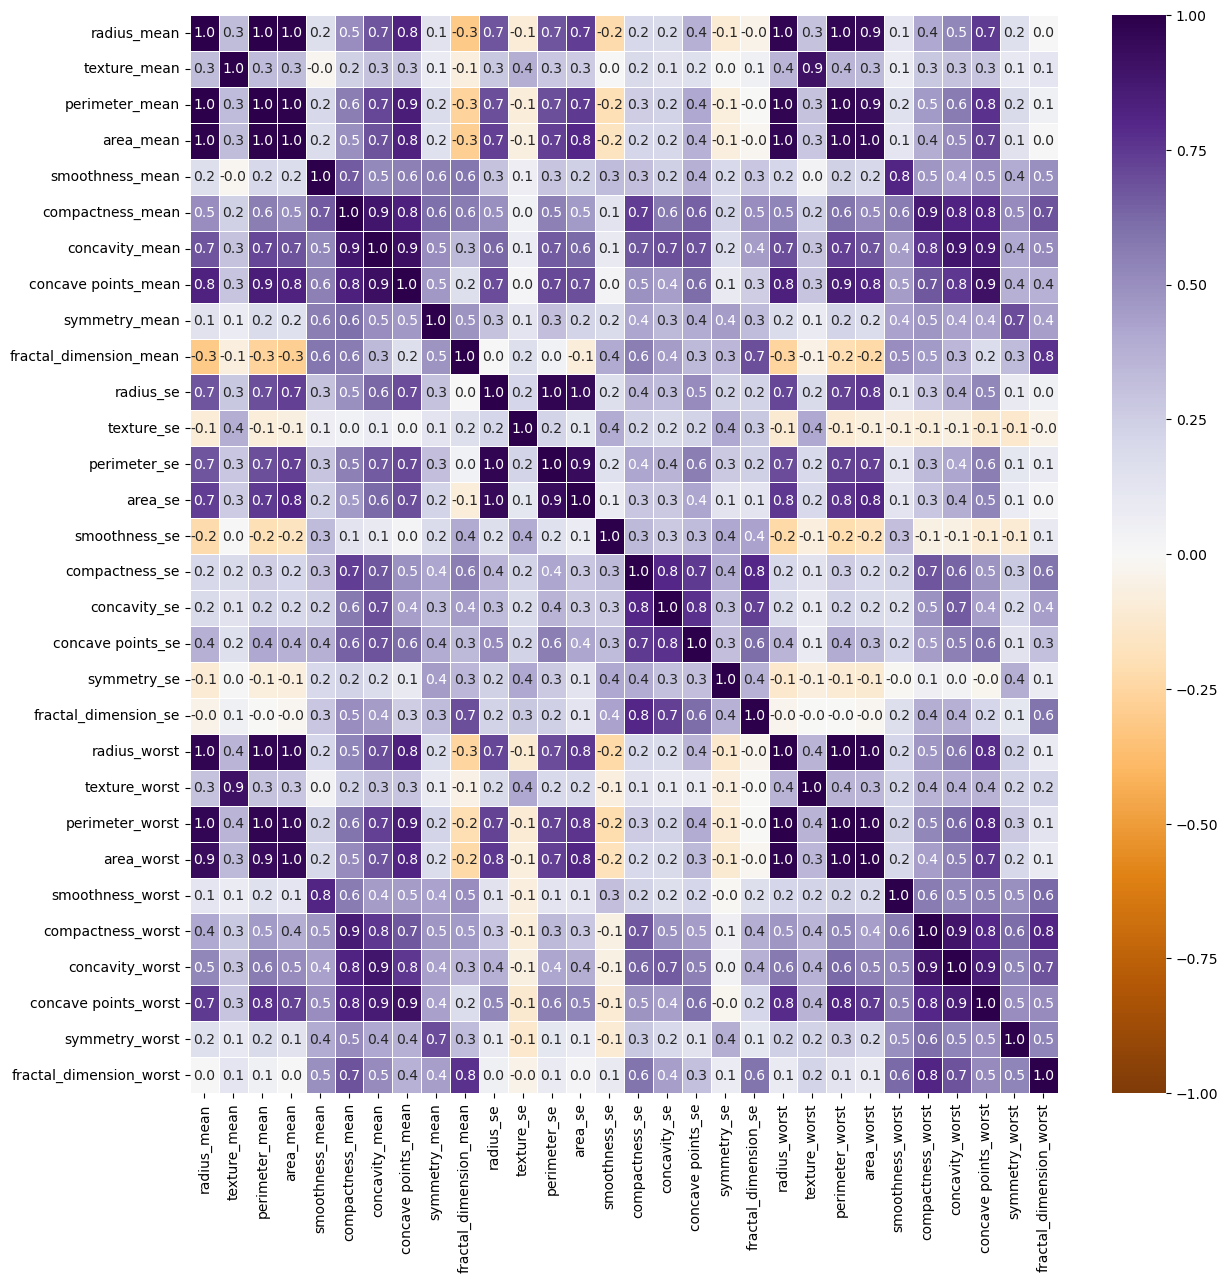

In [19]:
fig, ax = plt.subplots(figsize=(14, 14))
sb.heatmap(
    X.corr(),
    annot=True, linewidths=.5,
    fmt=".1f", vmin=-1, vmax=1,
    cmap="PuOr",
    ax=ax
)

## High correlation filter

In [20]:
correlation_matrix = X.corr().abs()
correlation_matrix.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


In [22]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

In [23]:
X_filtered = remove_collinear_features(X, 0.9)

Removed Columns {'perimeter_se', 'texture_worst', 'area_worst', 'concave points_worst', 'perimeter_worst', 'concave points_mean', 'area_mean', 'area_se', 'radius_worst', 'perimeter_mean'}


In [24]:
X_filtered.shape, X.shape

((569, 20), (569, 30))

# Dimensionality reduction
## Linear methods: PCA
We use the PCA implementation from Scikit-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

We can import this with, for example:
```python
from sklearn.decomposition import PCA
```

Then we create a "PCA object" in Python:
```python
pca = PCA(n_components=...).fit(X)
```
After that, data can be converted into corresponding PCA components with:
```python
X_pca = pca.transform(my_data_here)
```

### Task:
- Reduce the data ("X") to 2 dimensions using PCA.
- Display as a 2D scatter plot.

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)

X_pca = pca.transform(X)

# Displaying the components as a 2D plot

Possible representations can be created with `matplotlib` or `seaborn`.
For example:
```python
colors = ["crimson" if x == "M" else "teal" for x in y]

plt.scatter(..my_x..., ..my_y..., c=colors, alpha=0.5)
```

Or with Seaborn:
```python
fig, ax = plt.subplots(figsize=(8, 8))

sb.scatterplot(x=..my_x..., y=..my_y...,
hue=y, palette='Set1', ax=ax[0], alpha=0.5)
```

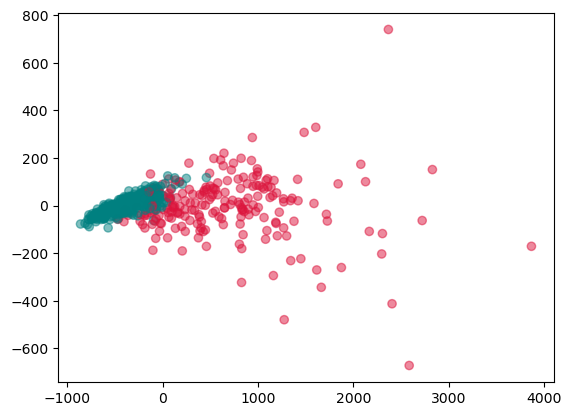

In [31]:
colors = ["crimson" if x == "M" else "teal" for x in y]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5)
# sb.scatterplot(X_pca)

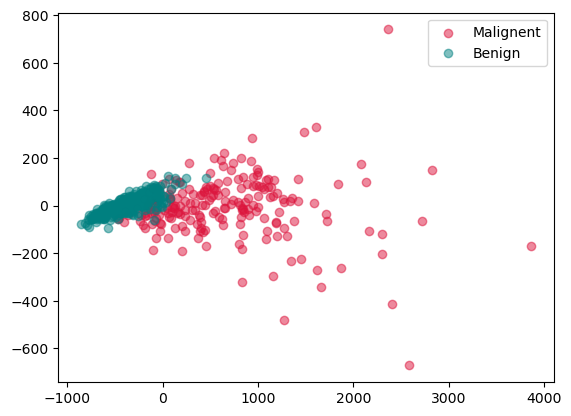

In [ ]:
idx = np.where(y == "M")
plt.scatter(X_pca[:, 0][idx], X_pca[:, 1][idx],
            c="crimson", alpha=0.5, label="Malignent")

idx = np.where(y == "B")
plt.scatter(X_pca[:, 0][idx], X_pca[:, 1][idx],
            c="teal", alpha=0.5, label="Benign")
plt.legend()

## Quick question:
- How does it look? Are you satisfied?
- What does `pca.explained_variance_ratio_` output, and is that good or bad?

In [ ]:
# PCA sucht Richtuung mit der höchsten Varianz. Sind Werte stark unausgeglichen (hoher Wert einer Dimension), ist dies ein Indikator für eine problematische Verteilung.
# PCA kann nur sinnvoll genutzt werden, wenn die Daten vorher skaliert wurden (z.B. mit StandardScaler)
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

## Scaling the features
We use Scikit-Learn's `StandardScaler` for this.
What exactly does it do?

### Task:
- Execute the code and look at `X_scaled`
- Then calculate PCA again, but this time with `X_scaled`. What changes and what do the plots look like now? Does `pca.explained_variance_ratio_` change?

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [55]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [56]:
pca = PCA(n_components=2).fit(X_scaled)

X_pca = pca.transform(X_scaled)

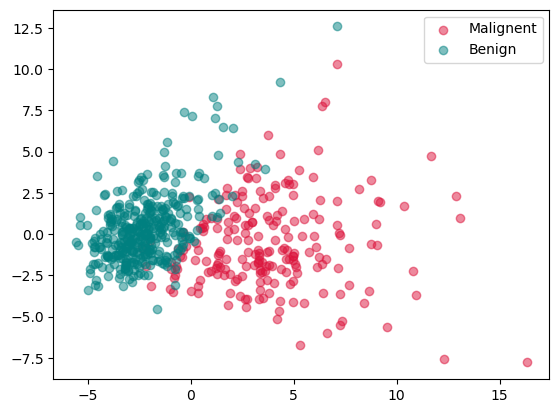

In [57]:
idx = np.where(y == "M")
plt.scatter(X_pca[:, 0][idx], X_pca[:, 1][idx],
            c="crimson", alpha=0.5, label="Malignent")

idx = np.where(y == "B")
plt.scatter(X_pca[:, 0][idx], X_pca[:, 1][idx],
            c="teal", alpha=0.5, label="Benign")
plt.legend()

## Kernel PCA

- Advantage: non-linear
- Disadvantage: additional parameters (“gamma”)

### Tasks
- Use Kernel PCA instead of PCA this time. Different values can be tried out as gamma values.
- Create plots again and compare them with the PCA plots


See also: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html?highlight=kernel%20pca#sklearn.decomposition.KernelPCA

In [76]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=0.005, random_state=0)

X_kpca = kpca.fit_transform(X_scaled)

X_kpca

array([[ 0.64302697,  0.15975808],
       [ 0.22604046, -0.33501933],
       [ 0.51164786, -0.10568389],
       ...,
       [ 0.11835184, -0.19197855],
       [ 0.72006976,  0.13056943],
       [-0.3679216 , -0.02138736]])

Text(0, 0.5, 'component 2')

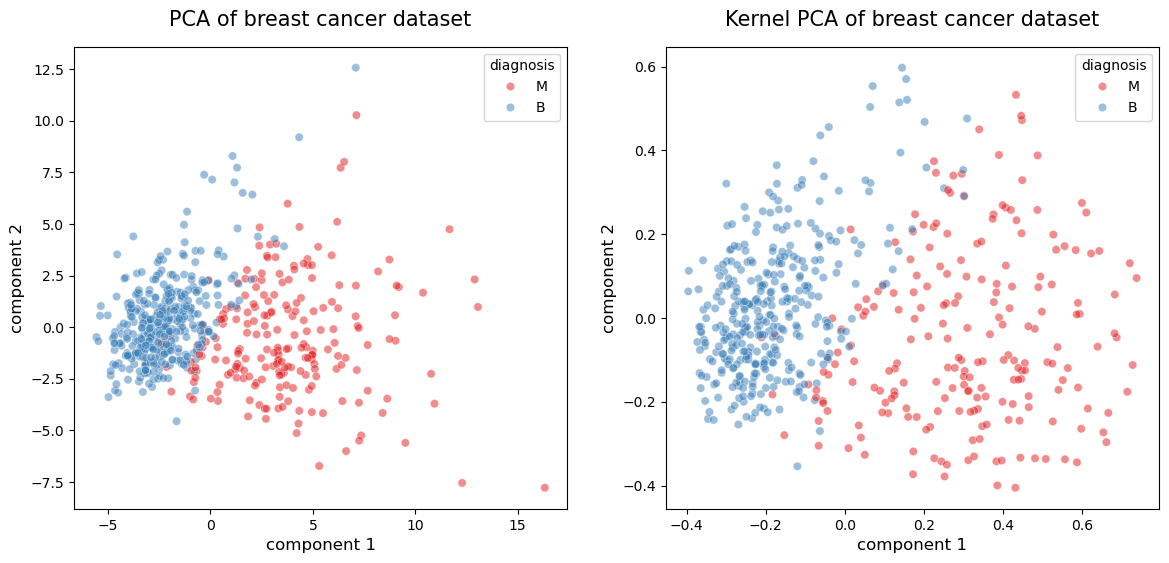

In [77]:
# Compare PCA with kernel-PCA
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14 ,6))

sb.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
               hue=y, palette='Set1',
               ax=ax[0], alpha=0.5)

sb.scatterplot(x=X_kpca[:,0], y=X_kpca[:,1],
               hue=y, palette='Set1',
               ax=ax[1], alpha=0.5)

ax[0].set_title("PCA of breast cancer dataset", fontsize=15, pad=15)
ax[1].set_title("Kernel PCA of breast cancer dataset", fontsize=15, pad=15)
ax[0].set_xlabel("component 1", fontsize=12)
ax[0].set_ylabel("component 2", fontsize=12)
ax[1].set_xlabel("component 1", fontsize=12)
ax[1].set_ylabel("component 2", fontsize=12)

## t-SNE
T-SNE is a much more complex technique for reducing dimensions. However, there are hardly any differences in its use compared to other techniques such as PCA.

The central parameter is `perplexity`, with typical values between 5 and 50.

### Tasks:
- Recalculate and display the dimensions (and compare with PCA).

See also: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#sklearn.manifold.TSNE

In [78]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [97]:
from sklearn.manifold import TSNE


tsne = TSNE(perplexity=23, random_state=0)

X_tsne = tsne.fit_transform(X_scaled)

Text(0, 0.5, 'component 2')

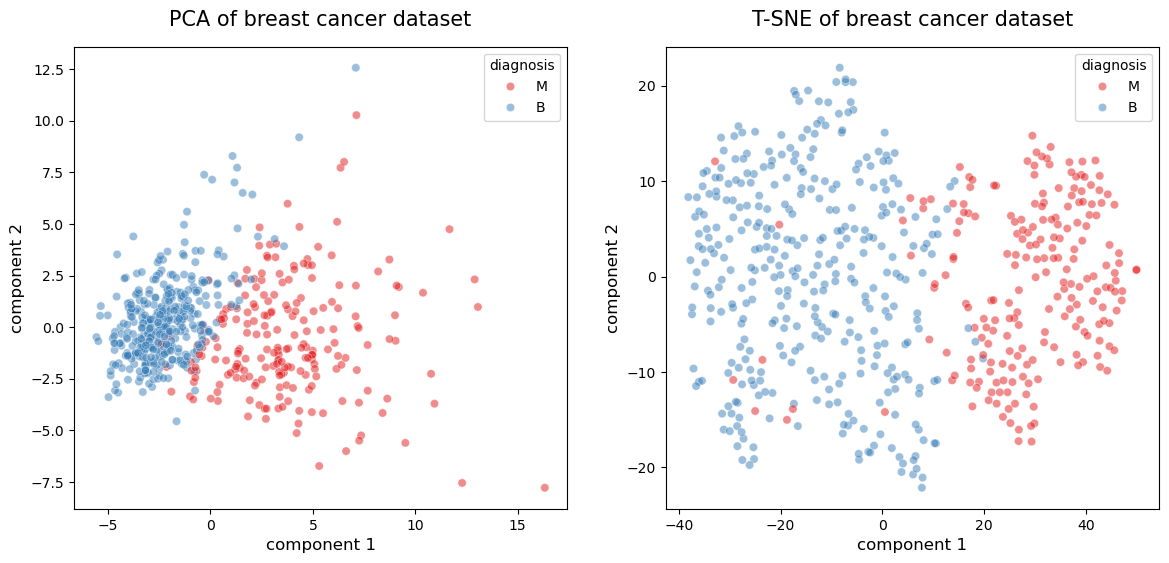

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14 ,6))

sb.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
               hue=y, palette='Set1',
               ax=ax[0], alpha=0.5)

sb.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1],
               hue=y, palette='Set1',
               ax=ax[1], alpha=0.5)

ax[0].set_title("PCA of breast cancer dataset", fontsize=15, pad=15)
ax[1].set_title("T-SNE of breast cancer dataset", fontsize=15, pad=15)
ax[0].set_xlabel("component 1", fontsize=12)
ax[0].set_ylabel("component 2", fontsize=12)
ax[1].set_xlabel("component 1", fontsize=12)
ax[1].set_ylabel("component 2", fontsize=12)

## t-SNE on top of pca

In [ ]:
from sklearn.manifold import TSNE



In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14 ,6))

sb.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
               hue=y, palette='Set1',
               ax=ax[0], alpha=0.5)

sb.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1],
               hue=y, palette='Set1',
               ax=ax[1], alpha=0.5)

ax[0].set_title("PCA of breast cancer dataset", fontsize=15, pad=15)
ax[1].set_title("T-SNE of breast cancer dataset", fontsize=15, pad=15)
ax[0].set_xlabel("component 1", fontsize=12)
ax[0].set_ylabel("component 2", fontsize=12)
ax[1].set_xlabel("component 1", fontsize=12)
ax[1].set_ylabel("component 2", fontsize=12)

## Bonus material --> MDS (Multidimensional Scaling)

A non-linear dimensionality reduction technique trying to preserve the distances between instances while reducing the dimensionality of non-linear data.
There are two types of MDS algorithms: Metric and Non-metric.

- disadvantage: slow!

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, metric=True, random_state=2)


## Isomap (Isometric mapping)

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')


More tipps and techniques: https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b